# scikit-learn中的多项式回归和Pipeline

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [52]:
X2[:5,:]

array([[ 1.        ,  1.88641351,  3.55855592],
       [ 1.        , -0.78078378,  0.60962331],
       [ 1.        ,  0.56168853,  0.31549401],
       [ 1.        ,  2.99967454,  8.99804732],
       [ 1.        , -1.95412793,  3.81861598]])

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2,y)
y_predict = lin_reg.predict(X2)

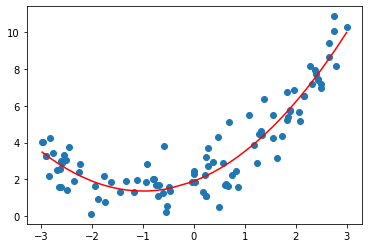

In [54]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)],color='r')
plt.show()

In [55]:
lin_reg.coef_

array([0.        , 1.07793174, 0.53876928])

In [56]:
lin_reg.intercept_

1.9031749664120994

In [57]:
# 关于polynomial

In [58]:
X = np.arange(1,11).reshape(-1,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [59]:
# poly 会增加所有 x1 x2 组合的二次项
# 问题 假如维度特别高 那么数据之间的量纲会差距很大 搜索的速度会特别慢 此时最好进行数据归一化
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

# Pipeline

In [61]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [64]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

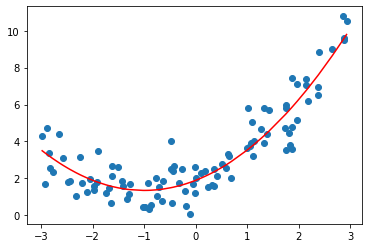

In [65]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)],color='r')
plt.show()